Elevation changes from SAR Amplitude images
==============

This notebook shows how to get elevation changes from SAR amplitude images using shape from shading techniques explained in (cite article). In this notebook we show the results for a Shishaldin dataset using TerraSAR-X images and an ArticDEM. Unfortunately the notebook cannot be rerun because it needs the original slc files and DEM that are not open source. 

## Importing libraries

'sfs' coregisters the slc images with a DEM

In [1]:
%matplotlib inline
import sfs
import lsquares
import numpy as np
import matplotlib.pyplot as plt
import h5py
import multiprocessing
from functools import partial
import matplotlib.image as image
import datetime as dt
import matplotlib.style
import matplotlib as mpl
import datetime as dt
mpl.rcParams.update(mpl.rcParamsDefault)

## H5 file names

The variable 'cor_stack' will contain the name of the h5 file where all the coregistered images and DEM will be. The variable 'pre_stack' will contain the name of the h5 file that will have the area of interest and the gradient of the given DEM.

In [2]:
cor_stack='projections.h5'
pre_stack='descending.h5'

## Coregistration of slcs

In the next cell we have the rutine that coregisters all slcs images contain in the folder 'data/slcs'. The output filename will be given by cor_stack. 

**THIS RUTINE USES ISCE FOR COREGISTRATION**.

In [ ]:
#Coregistering SAR images with the earliest image
sfs.coregistration(cor_stack)

insar of  ../data/slcs1/TDX1_SAR__SSC______HS_S_SRA_20191029T170418_20191029T170418/TDX1_SAR__SSC______HS_S_SRA_20191029T170418_20191029T170418.xml ../data/slcs1/TSX1_SAR__SSC______HS_S_SRA_20200503T170417_20200503T170417/TSX1_SAR__SSC______HS_S_SRA_20200503T170417_20200503T170417.xml
insar of  ../data/slcs1/TDX1_SAR__SSC______HS_S_SRA_20191029T170418_20191029T170418/TDX1_SAR__SSC______HS_S_SRA_20191029T170418_20191029T170418.xml ../data/slcs1/TSX1_SAR__SSC______HS_S_SRA_20200503T170417_20200503T170417/TSX1_SAR__SSC______HS_S_SRA_20200503T170417_20200503T170417.xml
This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2022-03

 Max threads used:            8
 DEM parameters:
 Dimensions:        41386       23940
 Top Left:   -164.34877670000000        54.965924399999999     
 Spacing:    1.8058701242000000E-005  -1.8058701242000000E-005
 Lon:   -164.34877670000000       -163.60141734909982     
 Lat:    54.533617150967764        54.965924399999999     
  
 Estimated DEM bounds needed for global height range: 
 Lon:   -164.26850683672387       -163.74344434493142     
 Lat:    54.576849347374406        54.939799939289237     
  
 Actual DEM bounds used: 
 Dimensions:        29077       20100
 Top Left:   -164.26852383168057        54.939811518004063     
 Spacing:    1.8058701242000000E-005  -1.8058701242000000E-005
 Lon:   -164.26852383168057       -163.74344903436818     
 Lat:    54.576849681741102        54.939811518004063     
 Lines:         1447       21546
 Pixels:         4445       33521
 Max DEM height:    2876.00000    
 Primary iterations:           25
 Secondary iterations:           10
 Distanc

### Plotting coregistered image and AOI

'sfs' helps to get the area of interest in radar coordinates using a lon/lat box. 

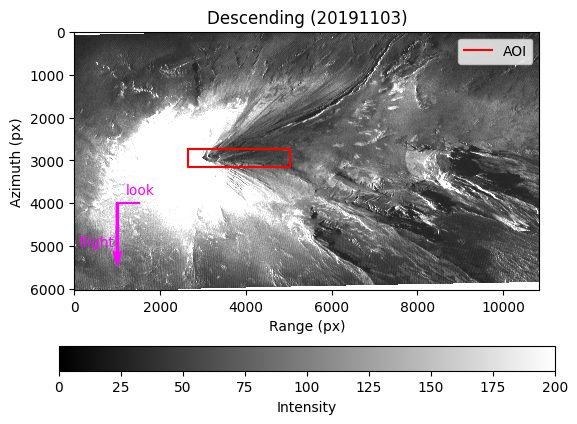

In [3]:
#Reading h5 file with coregistered images
h5i=h5py.File(cor_stack,'r')
keys=[key for key in h5i.keys()]
lonrdr=h5i[keys[0]+'/lon'][:]
latrdr=h5i[keys[0]+'/lat'][:]
amps1=h5i[keys[0]+'/amps1'][:]
h5i.close()

#Getting AOI in radar coordinates corresponding to certain longitudes and latitudes
lons=[-163.9814,-163.9614]
lats=[54.7554,54.7570]
x0,y0,xsizet,ysizet=sfs.get_box2(lonrdr,latrdr,lons=lons,lats=lats)

#Plotting a coregistered image and the AOI
plt.figure()
plt.title('Descending (20191103)')
plt.imshow(amps1,cmap='gray',vmin=0,vmax=200)
plt.colorbar(label='Intensity',orientation='horizontal')
plt.quiver(1000,4000,0,-1500,units='x',color='magenta',scale=1)
plt.plot([1000,1500],[4000,4000],color='magenta')
plt.plot([x0,x0,x0+xsizet,x0+xsizet,x0],[y0,y0+ysizet,y0+ysizet,y0,y0],color='red',label='AOI')
plt.text(1200,3800,'look',color='magenta')
plt.text(100,5000,'flight',color='magenta')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')
plt.legend()

plt.show()

## Preprocessing

The 'preprocessing' function clip the AOI and calculates the gradient of the given DEM along range coordinates 

In [4]:
#Creating new h5file clipping the AOI and calculating DEM gradient
sfs.preprocessing(lons=[-163.9814,-163.9614],lats=[54.7554,54.7570],projections=cor_stack)

Preprocessing for  20191029
Preprocessing for  20191103
Preprocessing for  20191109
Preprocessing for  20191114
Preprocessing for  20191120
Preprocessing for  20191201
Preprocessing for  20191217
Preprocessing for  20191223
Preprocessing for  20191228
Preprocessing for  20200108
Preprocessing for  20200114
Preprocessing for  20200119
Preprocessing for  20200125
Preprocessing for  20200130
Preprocessing for  20200205
Preprocessing for  20200210
Preprocessing for  20200216
Preprocessing for  20200221
Preprocessing for  20200227
Preprocessing for  20200303
Preprocessing for  20200309
Preprocessing for  20200314
Preprocessing for  20200320
Preprocessing for  20200325
Preprocessing for  20200331
Preprocessing for  20200405
Preprocessing for  20200411
Preprocessing for  20200416
Preprocessing for  20200422
Preprocessing for  20200427
Preprocessing for  20200503
Preprocessing for  20200508
Preprocessing for  20200514
Preprocessing for  20200519
Preprocessing for  20200525
Preprocessing for  2

### Plots for AOI

Here we plot the area of interest around the Shishaldin crater and the gradient of the ArcticDEM.

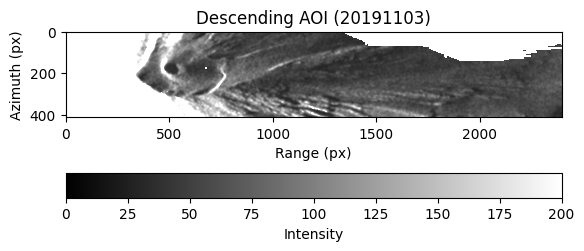

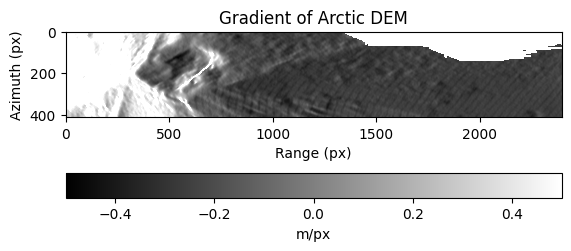

In [5]:
#Reading amplitude image for the AOI
h5i=h5py.File(pre_stack,'r')
keys=[key for key in h5i.keys()]
amp=h5i[keys[0]+'/amps'][:]
grd=h5i[keys[0]+'/grad'][:]
amps1=h5i[keys[1]+'/amps'][:]
h5i.close()

plt.figure()
plt.title('Descending AOI (20191103)')
plt.imshow(amps1,cmap='gray',vmin=0,vmax=200)
plt.colorbar(label='Intensity',orientation='horizontal')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')

plt.figure()
plt.title('Gradient of Arctic DEM')
plt.imshow(grd,cmap='gray',vmin=-0.5,vmax=0.5)
plt.colorbar(label='m/px',orientation='horizontal')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')

plt.show()

## Reconstruction of DEMs

The next cells shows the process to construct a DEM per amplitude image

### Standard deviation on amplitude images

We need to calculate the standar deviation on the amplitude images through time, to assign weights when the inversion is made

### Construction of DEMs

The library 'lsquares' makes the inversions using a least squares approach. Here we paralellize to optimize the calculation time.

In [6]:
#Calculate standard deviation on the amplitude images
sfs.calc_std(pre_stack)

#Construction of DEMs
demdefs=[]
def onedem(i,keys):
    key=keys[i]
    demdef=lsquares.getdem(key)
    return demdef,'d'
pool = multiprocessing.Pool(processes=13)
subrutina=partial(onedem,keys=keys)
demdefs,nada=zip(*pool.map(subrutina, range(len(keys))))
pool.close()
pool.join()

Start gradient for 20200114
Start gradient for 20200108
Start gradient for 20191120
Start gradient for 20191223Start gradient for
 Start gradient for20200119
 20191109Start gradient for 20191029Start gradient for 
Start gradient for 20191228

20191103
Start gradient for 20200125
Start gradient forStart gradient for 20191114 Start gradient for
 2019121720191201

Finished gradient for 20200114
Start integration for 20200114
Finished gradient for 20200119
Start integration for 20200119
Finished gradient for 20191228
Start integration for 20191228
Finished gradient for 20191223
Start integration for 20191223
Finished gradient for 20191109
Start integration for 20191109
Finished gradient for 20191114
Start integration for 20191114
Finished gradient for 20191120
Start integration for 20191120
Finished gradient for 20191103
Start integration for 20191103
Finished gradient for 20191029
Start integration for 20191029
Finished gradient for 20200108
Start integration for 20200108
Finished gradien

### Plot of ArticDEM and reconstructed DEM

Here we show the original ArticDEM and a reconstructed DEM using the amplitude image on November 3, 2019

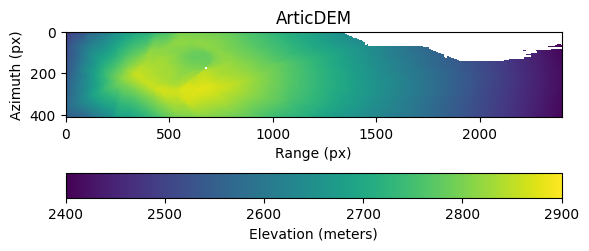

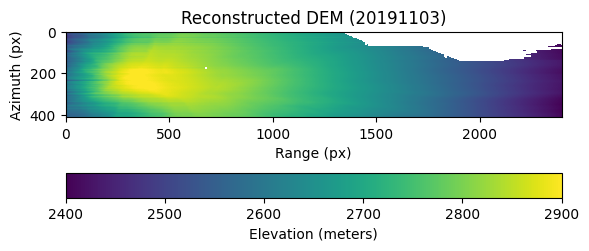

In [8]:
#Save uncorrected DEMs
demdefs=np.array(demdefs)
np.save('demdefs.npy',demdefs)

#Plot given DEM
h5i=h5py.File(pre_stack,'r')
dem=h5i[keys[0]+'/dem'][:]
grd=h5i[keys[0]+'/grad'][:]
lon=h5i[keys[0]+'/lon'][:]
lat=h5i[keys[0]+'/lat'][:]
h5i.close()
plt.figure()
plt.title('ArticDEM')
plt.imshow(dem,vmin=2400,vmax=2900)
plt.colorbar(label='Elevation (meters)',orientation='horizontal')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')

#Plot one uncorrected DEM
plt.figure()
plt.title('Reconstructed DEM (20191103)')
plt.imshow(demdefs[1,:,:],vmin=2400,vmax=2900)
plt.colorbar(label='Elevation (meters)',orientation='horizontal')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')

plt.show()

## Synthetic Case

This cell creates a synthetic collapse using the function 'fake_defo', adds the result in the reconstructed DEM for the amplitude image on October 29, 2019. Then it reconstructs the amplitude image from that DEM for three cases:

1. Without Shadow
2. Assigning shadow values for negative gradient values
3. Simulating shadow for negative and some positive gradient values.

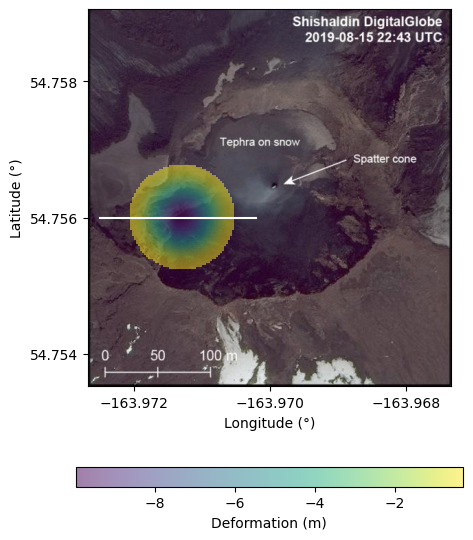

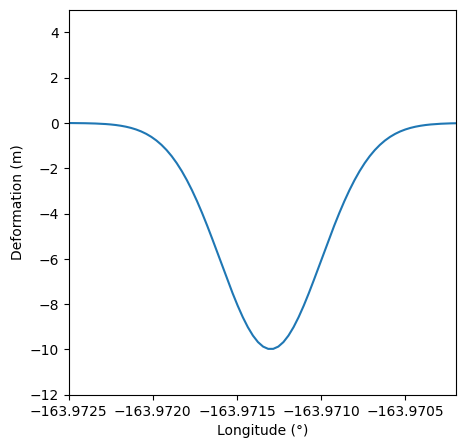

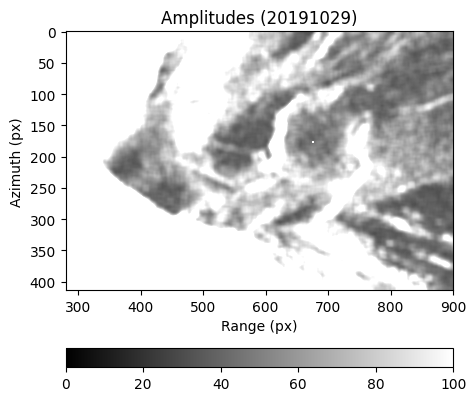

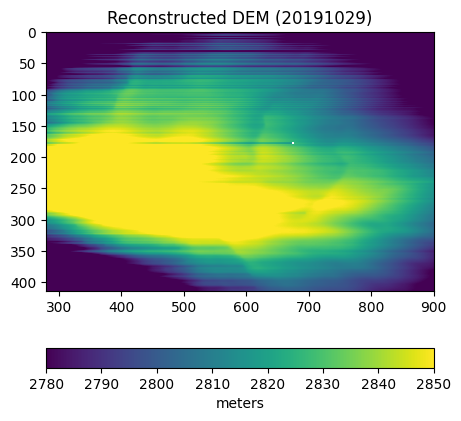

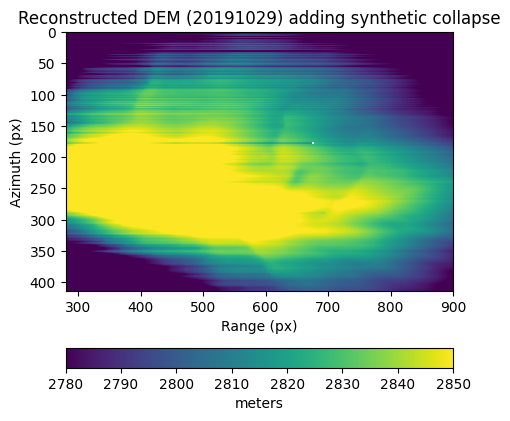

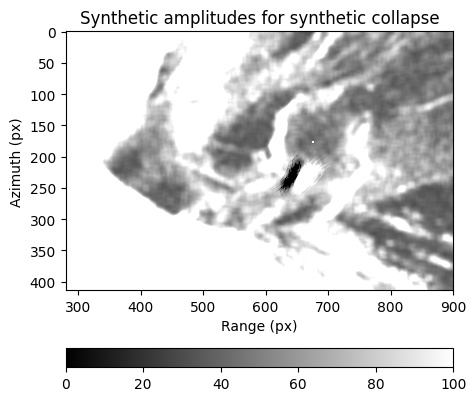

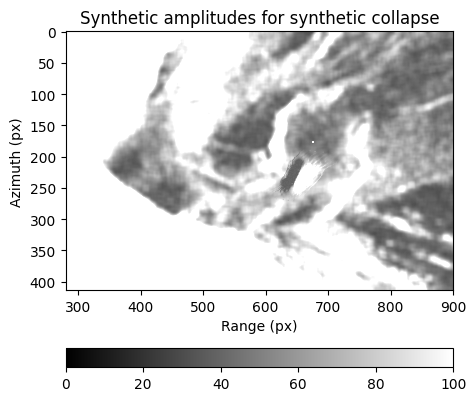

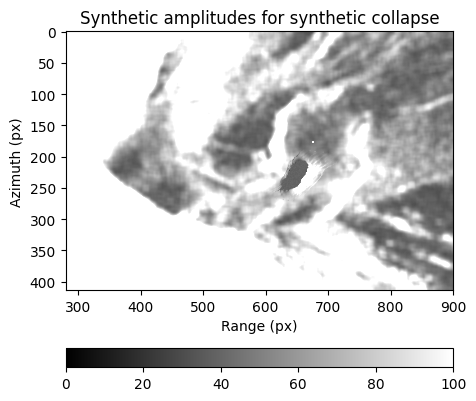

In [9]:
#Function creating hypothetical collapse
def fake_defo(lo,la,loncen,latcen,radius,scale):
    return -scale*np.exp(-np.power(lo - loncen, 2.) / (2 * np.power(radius, 2.)))*np.exp(-np.power(la - latcen, 2.) / (2 * np.power(radius, 2.)))

#Radius of collapse
radius=3*0.0001

#Center of the collapse
loncen=-163.9713
latcen=54.756

#Longitude and Latitudes to calculate synthetic collapse
lons=[loncen-10*radius,loncen+10*radius]
lats=[latcen-10*radius,latcen+10*radius]

points=200
x=np.linspace(lons[0],lons[1],points)
y=np.linspace(lats[0],lats[1],points)

lons,lats=np.meshgrid(x,y)
im = image.imread('before.png')

#Creating synthetic collapse
z=fake_defo(lons,lats,loncen,latcen,radius,scale=10)
zcp=np.copy(z)
zcp[np.abs(z)<0.3]=np.nan

#Plotting synthetic collapse in goegraphic coordinates
plt.figure(figsize=(5,7))
plt.imshow(im, aspect='auto', extent=(-163.97268, -163.96734, 54.75352, 54.75906))
plt.imshow(zcp,extent=[loncen-10*radius,loncen+10*radius,latcen-10*radius,latcen+10*radius],alpha=0.5)
plt.plot([-163.9725,-163.9702],[latcen,latcen],color='white')
plt.colorbar(orientation='horizontal',label='Deformation (m)')
plt.xlim(-163.97268,-163.96734)
plt.ylim(54.75352, 54.75906)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.ticklabel_format(useOffset=False)
plt.locator_params(nbins=3)

#Plotting profile of synthetic collapse in goegraphic coordinates
plt.figure(figsize=(5,5))
plt.plot(lons[100,:],z[100,:])
plt.ylabel('Deformation (m)')
plt.xlabel('Longitude (°)')
plt.ylim(-12,5)
plt.xlim(-163.9725,-163.9702)
plt.ticklabel_format(useOffset=False)

#Selecting the pixels on radar coordinates to subtract the collapse
demcp=np.copy(demdefs[0,:,:])
pos=np.argwhere(np.logical_and(np.logical_and(lon>=loncen-radius,lon<=loncen+radius),np.logical_and(lat>=latcen-radius,lat<=latcen+radius)))
sellat=lat[np.logical_and(np.logical_and(lon>=loncen-radius,lon<=loncen+radius),np.logical_and(lat>=latcen-radius,lat<=latcen+radius))]
sellon=lon[np.logical_and(np.logical_and(lon>=loncen-radius,lon<=loncen+radius),np.logical_and(lat>=latcen-radius,lat<=latcen+radius))]
seldem=demcp[np.logical_and(np.logical_and(lon>=loncen-radius,lon<=loncen+radius),np.logical_and(lat>=latcen-radius,lat<=latcen+radius))]

#Plot of the original amplitude image
plt.figure(figsize=(5,5))
plt.title('Amplitudes (20191029)')
plt.imshow(amp,vmin=0,vmax=100, cmap='gray')
plt.colorbar(orientation='horizontal')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')
plt.xlim(280,900)

#Plotting reconstructed DEM for 20191029
plt.figure(figsize=(5,5))
plt.title('Reconstructed DEM (20191029)')
plt.imshow(demdefs[0,:,:],vmin=2780,vmax=2850)
plt.colorbar(orientation='horizontal',label='meters')
plt.xlim(280,900)

#Adding the synthetic collapse to the reconstructed DEM
for p in pos:
    defo=fake_defo(lon[p[0],p[1]],lat[p[0],p[1]],loncen,latcen,0.0001,10)
    if not np.isnan(defo):
        demcp[p[0],p[1]]+=defo

#Plotting the reconstructed DEM adding the collapse
plt.figure(figsize=(5,5))
plt.title('Reconstructed DEM (20191029) adding synthetic collapse')
plt.imshow(demcp,vmin=2780,vmax=2850)
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')
plt.xlim(280,900)
plt.colorbar(orientation='horizontal',label='meters')

#Reconstructing the amplitude image 
adef,bdef,cdef=lsquares.getabc_matrices('20191029')
shade=lsquares.get_shadow(amp,lon,lat)
newamp=lsquares.get_amp(demcp,adef,bdef,cdef,np.nanmin(amp),shade,pos)

plt.figure(figsize=(5,5))
plt.title('Synthetic amplitudes for synthetic collapse')
plt.imshow(newamp,vmin=0,vmax=100, cmap='gray')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')
plt.xlim(280,900)
plt.colorbar(orientation='horizontal')

#Reconstructing amplitude image assigning shade values to negative gradient values
newamp1=lsquares.get_amp(demcp,adef,bdef,cdef,np.nanmin(amp),shade,pos,case=2)

plt.figure(figsize=(5,5))
plt.title('Synthetic amplitudes for synthetic collapse')
plt.imshow(newamp1,vmin=0,vmax=100, cmap='gray')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')
plt.xlim(280,900)
plt.colorbar(orientation='horizontal')

#Reconstructing amplitude image simulating shadow even in some positive gradient values
newamp2=lsquares.get_amp(demcp,adef,bdef,cdef,np.nanmin(amp),shade,pos,case=3)

plt.figure(figsize=(5,5))
plt.title('Synthetic amplitudes for synthetic collapse')
plt.imshow(newamp2,vmin=0,vmax=100, cmap='gray')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')
plt.xlim(280,900)
plt.colorbar(orientation='horizontal')

plt.show()

## Correction of DEMs using fix highest point technique

In the next cell all the DEMs are corrected fixing the highest elevation point in every azimuth of the reconstructed DEM.

In [10]:
#Correct the DEMs using the fix highest point approach
demdefs_lr=lsquares.correct_dems(demdefs)

Correcting DEM for 20191029
Correcting DEM for 20191103
Correcting DEM for 20191109
Correcting DEM for 20191114
Correcting DEM for 20191120
Correcting DEM for 20191201
Correcting DEM for 20191217
Correcting DEM for 20191223
Correcting DEM for 20191228
Correcting DEM for 20200108
Correcting DEM for 20200114
Correcting DEM for 20200119
Correcting DEM for 20200125
Correcting DEM for 20200130
Correcting DEM for 20200205
Correcting DEM for 20200210
Correcting DEM for 20200216
Correcting DEM for 20200221
Correcting DEM for 20200227
Correcting DEM for 20200303
Correcting DEM for 20200309
Correcting DEM for 20200314
Correcting DEM for 20200320
Correcting DEM for 20200325
Correcting DEM for 20200331
Correcting DEM for 20200405
Correcting DEM for 20200411
Correcting DEM for 20200416
Correcting DEM for 20200422
Correcting DEM for 20200427
Correcting DEM for 20200503
Correcting DEM for 20200508
Correcting DEM for 20200514
Correcting DEM for 20200519
Correcting DEM for 20200525
Correcting DEM for 2

### Plotting results

Here we show a comparison between the uncorrected DEM and the corrected DEM using the technique mentioned above.

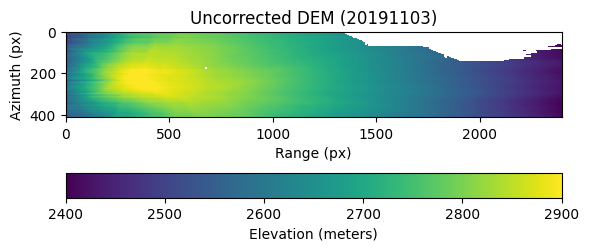

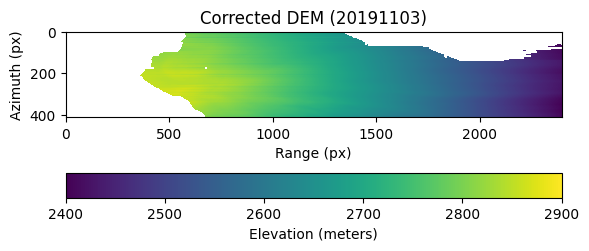

In [11]:
#Plot one uncorrected DEM
plt.figure()
plt.title('Uncorrected DEM (20191103)')
plt.imshow(demdefs[1,:,:],vmin=2400,vmax=2900)
plt.colorbar(label='Elevation (meters)',orientation='horizontal')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')

#Plot one corrected DEM
plt.figure()
plt.title('Corrected DEM (20191103)')
plt.imshow(demdefs_lr[1,:,:],vmin=2400,vmax=2900)
plt.colorbar(label='Elevation (meters)',orientation='horizontal')
plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')

plt.show()

### Calculation elevation changes

Here we calculate the elevation changes in using the first available amplitude image on October 29, 2019 and the image on Novemeber 3, 2019

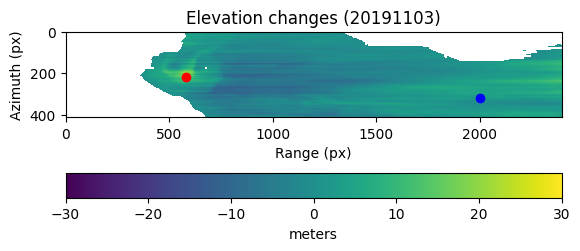

In [12]:
#Plot elevation changes between 20191029 and 20191103
plt.figure()
plt.title('Elevation changes (20191103)')
plt.imshow(demdefs_lr[1,:,:]-demdefs_lr[0,:,:],vmin=-30,vmax=30)
plt.colorbar(label='meters',orientation='horizontal')

#Point inside the crater
plt.scatter([2000],[320],color='blue')

#Point in stable zone
plt.scatter([580],[220],color='red')

plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')

plt.show()

### Time series for elevation changes

Here we show time series for a point inside the crater (red point) in the previous plot and a point in a stable point (blue point) 

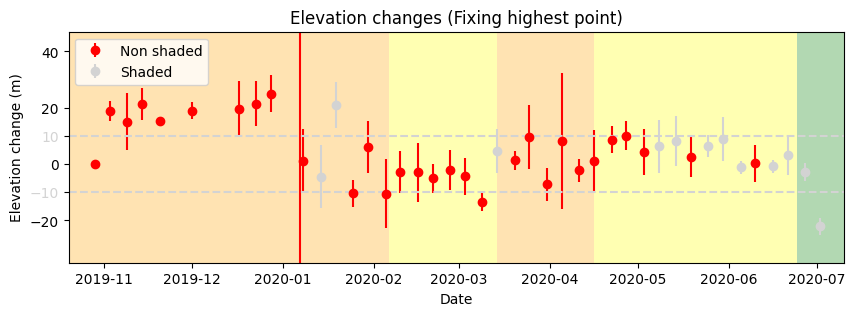

In [13]:
#Set point variable to 'crater' to plot the time series for a point inside the crater 
#or 'stable' to see the time series in a stable zone
point='crater'
if point=='crater':
    fila=222
    col=580
    c='red'
else:
    fila=320
    col=2000
    c='blue'

#Calculate elevation changes for all the amplitude images
changes=[]
for demdef in demdefs_lr:
    changes.append(demdef-demdefs_lr[0,:,:])
changes=np.array(changes)

#Mask to calculate standard deviation through time
mask=np.ones(changes[0,:,:].shape)
mask[:,1000::]=np.nan
maskoutan=np.isnan(mask)

#Calculation of standard deviation through time to calculate uncertainties
errors=[]
for i in range(changes.shape[0]):
    errors.append(np.nanstd(changes[i,:,:][maskoutan]))

fechas=[dt.datetime.strptime(key,'%Y%m%d') for key in keys]

#Plot of AVO aviation color codes
fig22=plt.figure(figsize=(10,3))
ax22 = fig22.add_subplot(111)
ax22.set_title('Elevation changes (Fixing highest point)')
ax22.axvspan(dt.datetime.strptime('20191020','%Y%m%d'), dt.datetime.strptime('20200206','%Y%m%d'), facecolor='orange', alpha=0.3)
ax22.axvspan(dt.datetime.strptime('20200206','%Y%m%d'), dt.datetime.strptime('20200314','%Y%m%d'), facecolor='yellow', alpha=0.3)
ax22.axvspan(dt.datetime.strptime('20200314','%Y%m%d'), dt.datetime.strptime('20200416','%Y%m%d'), facecolor='orange', alpha=0.3)
ax22.axvspan(dt.datetime.strptime('20200416','%Y%m%d'), dt.datetime.strptime('20200624','%Y%m%d'), facecolor='yellow', alpha=0.3)
ax22.axvspan(dt.datetime.strptime('20200624','%Y%m%d'), dt.datetime.strptime('20200710','%Y%m%d'), facecolor='green', alpha=0.3)
ax22.axvline(dt.datetime.strptime('20200107','%Y%m%d'),c='red')
ax22.set_xlim([dt.datetime.strptime('20191020','%Y%m%d'),dt.datetime.strptime('20200710','%Y%m%d')])
ax22.set_ylim(-35,47)
ax22.set_xlabel('Date')
ax22.set_ylabel('Elevation change (m)')

#Check if the selected pixel is shaded or not
h5o=h5py.File(pre_stack,'r')
color=[]
xcolor=[]
colore=[]
black=[]
xblack=[]
blacke=[]
for i,key in enumerate(keys):
    ampcp=h5o[key+'/amps'][:]
    loncp=h5o[key+'/lon'][:]
    latcp=h5o[key+'/lat'][:]
    pshade=lsquares.get_shadow(ampcp,loncp,latcp)
    if ampcp[fila,col]>pshade:
        color.append(changes[i,fila,col])
        xcolor.append(fechas[i])
        colore.append(errors[i])
    else:
        black.append(changes[i,fila,col])
        xblack.append(fechas[i])
        blacke.append(errors[i])
h5o.close()

#Plot elevation changes time series
ax22.errorbar(xcolor,color,yerr=colore,c=c,marker='o',linestyle = 'None',label='Non shaded')
ax22.errorbar(xblack,black,yerr=blacke,c='lightgray',marker='o',linestyle = 'None',label='Shaded')
ax22.axhline(10,c='lightgray',ls='--')
ax22.axhline(-10,c='lightgray',ls='--')
ax22.set_yticks([-20,-10,0,10,20,40])
colors=['k','lightgray','k','lightgray','k','k']
for ticklabel, tickcolor in zip(ax22.get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)
ax22.legend()

plt.show()

## Correction for DEMs using the technique splitting range

Here we use the splittin technique to calculate DEMs on each zone and the elevation changes for all the available images.

In [1]:
demdefs,changes,maskoutan,maskoutde,maskin=lsquares.getdems_sr()

DEM for 20191029
DEM for 20191103
DEM for 20191114
DEM for 20191201
DEM for 20191223
DEM for 20200108
DEM for 20200119
DEM for 20191217
DEM for 20200125
DEM for 20191120
DEM for 20191109
DEM for 20191228
DEM for 20200114
DEM for
 20200130DEM for 20200210
DEM for 20200221
DEM for
 20200303DEM for 20200314
DEM for 20200325
DEM for 20200205
DEM for 20200227
DEM for 20200331
DEM for 20200216
DEM for 20200320
DEM for 20200309
DEM for 20200405
DEM for 20200416
DEM for 20200427
DEM for 20200508
DEM for 20200519
DEM for 20200530
DEM for 20200411
DEM for 20200503
DEM for 20200422
DEM for 20200525
DEM for 20200605
DEM for 20200514
DEM for 20200610
DEM for 20200621
DEM for 20200702
DEM for 20200616
DEM for 20200627


### Saving results

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
np.save('demdefs_sr.npy',demdefs)
np.save('changes_sr.npy',changes)
np.save('maskoutan.npy',maskoutant)
np.save('maskoutde.npy',maskoutde)
np.save('maskin.npy',maskin)

### Plotting results

Here we show a reconstructed DEM using the second technique.

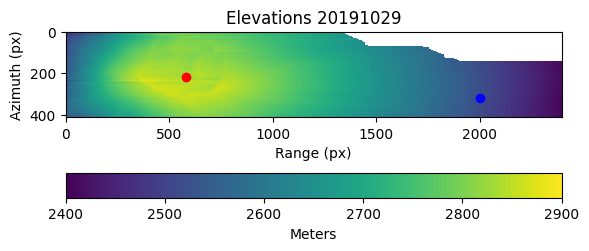

In [16]:
h5i = h5py.File(pre_stack,'r')
llaves=[key for key in h5i.keys()]
h5i.close()
keys=llaves
plt.figure()
plt.title('Elevations '+llaves[0])
plt.imshow(demdefs[0,:,:],vmin=2400,vmax=2900)
plt.colorbar(label='Meters',orientation='horizontal')

#Point inside the crater
plt.scatter([2000],[320],color='blue')

#Point in stable zone
plt.scatter([580],[220],color='red')

plt.xlabel('Range (px)')
plt.ylabel('Azimuth (px)')

plt.show()

### Time series for elevation changes

Here we show the elevation changes using the second technique (splitting range)

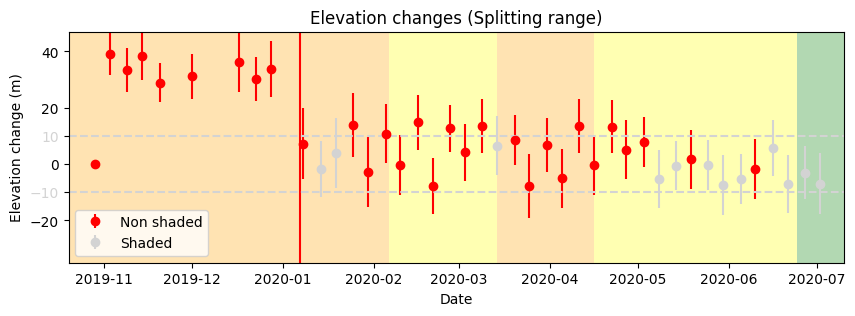

In [18]:
#Set point variable to 'crater' to plot the time series for a point inside the crater 
#or 'stable' to see the time series in a stable zone
point='crater'
if point=='crater':
    fila=222
    col=580
    c='red'
else:
    fila=320
    col=2000
    c='blue'

#Mask to calculate standard deviation through time
errors=[]
changes[:,0,:]=np.nan
for i in range(changes.shape[0]):
    errors.append(np.nanstd(changes[i,:,:][maskoutde])+np.nanstd(changes[i,:,:][maskoutan]))

fechas=[dt.datetime.strptime(key,'%Y%m%d') for key in keys]

#Plot of AVO aviation color codes
fig22=plt.figure(figsize=(10,3))
ax22 = fig22.add_subplot(111)
ax22.set_title('Elevation changes (Splitting range)')
ax22.axvspan(dt.datetime.strptime('20191020','%Y%m%d'), dt.datetime.strptime('20200206','%Y%m%d'), facecolor='orange', alpha=0.3)
ax22.axvspan(dt.datetime.strptime('20200206','%Y%m%d'), dt.datetime.strptime('20200314','%Y%m%d'), facecolor='yellow', alpha=0.3)
ax22.axvspan(dt.datetime.strptime('20200314','%Y%m%d'), dt.datetime.strptime('20200416','%Y%m%d'), facecolor='orange', alpha=0.3)
ax22.axvspan(dt.datetime.strptime('20200416','%Y%m%d'), dt.datetime.strptime('20200624','%Y%m%d'), facecolor='yellow', alpha=0.3)
ax22.axvspan(dt.datetime.strptime('20200624','%Y%m%d'), dt.datetime.strptime('20200710','%Y%m%d'), facecolor='green', alpha=0.3)
ax22.axvline(dt.datetime.strptime('20200107','%Y%m%d'),c='red')
ax22.set_xlim([dt.datetime.strptime('20191020','%Y%m%d'),dt.datetime.strptime('20200710','%Y%m%d')])
ax22.set_ylim(-35,47)
ax22.set_xlabel('Date')
ax22.set_ylabel('Elevation change (m)')

#Check if the selected pixel is shaded or not
h5o=h5py.File(pre_stack,'r')
color=[]
xcolor=[]
colore=[]
black=[]
xblack=[]
blacke=[]
for i,key in enumerate(keys):
    ampcp=h5o[key+'/amps'][:]
    loncp=h5o[key+'/lon'][:]
    latcp=h5o[key+'/lat'][:]
    pshade=lsquares.get_shadow(ampcp,loncp,latcp)
    if ampcp[fila,col]>pshade:
        color.append(changes[i,fila,col])
        xcolor.append(fechas[i])
        colore.append(errors[i])
    else:
        black.append(changes[i,fila,col])
        xblack.append(fechas[i])
        blacke.append(errors[i])
h5o.close()

#Plot elevation changes time series
ax22.errorbar(xcolor,color,yerr=colore,c=c,marker='o',linestyle = 'None',label='Non shaded')
ax22.errorbar(xblack,black,yerr=blacke,c='lightgray',marker='o',linestyle = 'None',label='Shaded')
ax22.axhline(10,c='lightgray',ls='--')
ax22.axhline(-10,c='lightgray',ls='--')
ax22.set_yticks([-20,-10,0,10,20,40])
colors=['k','lightgray','k','lightgray','k','k']
for ticklabel, tickcolor in zip(ax22.get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)
ax22.legend()

plt.show()